In [1]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

In [2]:
from tensorflow.keras.models import load_model
model = load_model('D:/DATASET/Models/model_steatosis.h5')

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [ ]:
for layer in model.layers:
    print(layer.name)

In [ ]:
def predict_new_image(image_path, model_path='D:/DATASET/Models/model_steatosis.h5'):
    """ Load an image, preprocess it, and use a trained model to predict the steatosis level. """

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Normalize the image

    # Predict the steatosis level
    probabilities = model.predict(img_array)
    predicted_class = np.argmax(probabilities)

    # Show the image and the prediction
    plt.imshow(img)
    plt.title(f'Predicted Steatosis Level: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class

In [ ]:
def extract_and_display_image(image_path, feature_model):
    img = Image.open(image_path)
    img_resized = img.resize((299, 299), Image.ANTIALIAS)
    img_array = np.array(img_resized) / 255.0
    img_array = img_array[np.newaxis, ...]

    # Display the original image
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Get the feature maps
    feature_maps = feature_model.predict(img_array)[0]
    return feature_maps

In [ ]:
def visualize_feature_maps(feature_maps, num_features=15):
    # Display the first 'num_features' feature maps
    fig, axes = plt.subplots(nrows=int(np.sqrt(num_features)), ncols=int(np.sqrt(num_features)), figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < num_features:
            ax.imshow(feature_maps[:, :, i], cmap='viridis')
            ax.axis('off')
    plt.show()

In [ ]:
# Create a model for feature map extraction
feature_model = Model(inputs=model.input, outputs=model.get_layer('conv5_block3_3_conv').output)

In [ ]:
image_path = "D:/DATASET/CNN/steatosis/train/2/23_184_101.png"
feature_maps = extract_and_display_image(image_path, feature_model)
visualize_feature_maps(feature_maps)
predicted_class = predict_new_image(image_path)

In [ ]:
# Assuming you have a test image 
image_path = 'D:/DATASET/CNN/steatosis/train/2/5_42_24.png'
predicted_class = predict_new_image(image_path)

In [3]:
def crop_and_predict_large_image(image_path, model_path):
    # Load the pre-trained model
    model = load_model(model_path)
    
    # Load the image
    img = Image.open(image_path)

    # Define crop size and step size for the original desired crop dimensions
    crop_width, crop_height = 185, 93
    model_input_size = (299, 299)  # Model's expected input size

    # Initialize a list to store scores and prepare for cropping
    scores = []
    num_rows = (img.height // crop_height)
    num_cols = (img.width // crop_width)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

    # Crop the image and predict for each crop
    for i in range(0, img.height - crop_height + 1, crop_height):
        for j in range(0, img.width - crop_width + 1, crop_width):
            crop = img.crop((j, i, j + crop_width, i + crop_height))
            crop = crop.resize(model_input_size)  # Resize the crop to match the model's input size
            crop_array = np.array(crop) / 255.0  # Normalize the image data
            crop_array = np.expand_dims(crop_array, axis=0)  # Add batch dimension

            # Predict the class and store the score
            prediction = model.predict(crop_array)
            predicted_class = np.argmax(prediction)
            scores.append(predicted_class)

            # Plot each crop
            ax_idx = (i // crop_height, j // crop_width)
            axs[ax_idx].imshow(crop)
            axs[ax_idx].title.set_text(f'Score: {predicted_class}')
            axs[ax_idx].axis('off')

    # Calculate the average score of all crops
    average_score = np.mean(scores)

    # Show the large image with the average score
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.title(f'Large Image with Average Score: {average_score:.2f}')
    plt.axis('off')
    plt.show()
    print(f'Average Steatosis Score for the image: {average_score:.2f}')

    return average_score

1/1 [==============================] - 1s 1s/step


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

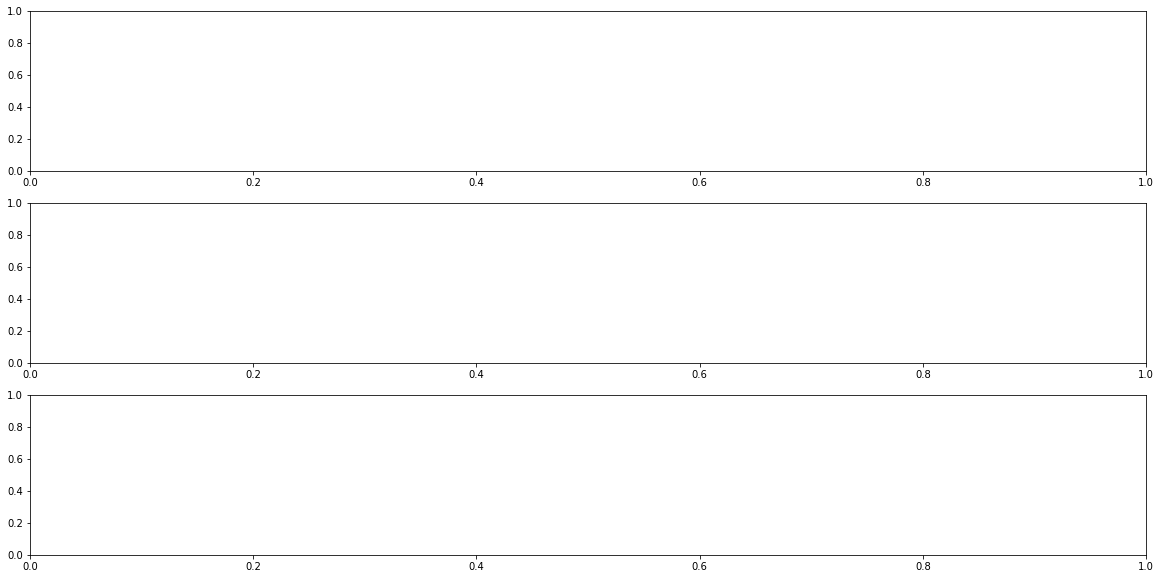

In [5]:
model_path = 'D:/DATASET/Models/model_steatosis.h5'
image_path = "D:/DATASET/CNN/steatosis/train/2/23_184_101.png"
average_steatosis_score = crop_and_predict_large_image(image_path, model_path)